<a href="https://colab.research.google.com/github/xiaomai2000/my.GCP/blob/main/colab/OpenCV/KNN.mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST digits

In [34]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist

train_dataset: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

train_dataset: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

test_dataset: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

test_dataset: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [6]:
(train_dataset, train_labels), (test_dataset, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
train_dataset.shape

(60000, 28, 28)

In [8]:
# Preview images

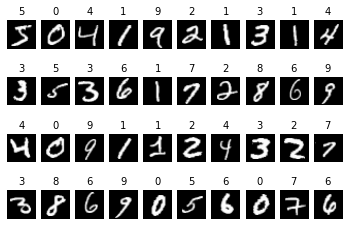

In [12]:
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.imshow(train_dataset[i], cmap='gray')
  plt.title(train_labels[i], fontsize=10)
  plt.axis('off')

plt.show()

In [15]:
train_labels = np.array(train_labels, dtype=np.int32)

In [19]:
train_labels[0:5]

array([5, 0, 4, 1, 9], dtype=int32)

In [20]:
def raw_pixels(img):
  return img.flatten()

In [21]:
# Shuffle

In [22]:
shuffle = np.random.permutation(len(train_dataset))

In [25]:
shuffle.shape

(60000,)

In [24]:
train_dataset, train_labels = train_dataset[shuffle], train_labels[shuffle]

In [26]:
raw_descriptors = []

In [27]:
for img in train_dataset:
  raw_descriptors.append(np.float32(raw_pixels(img)))

In [28]:
raw_descriptos = np.squeeze(raw_descriptors)

In [29]:
partition = int(0.5 * len(raw_descriptors))

In [30]:
raw_descriptors_train, raw_descriptors_test = np.split(raw_descriptors, [partition])

In [31]:
labels_train, labels_test = np.split(train_labels, [partition])

In [32]:
# Train the KNN model


In [35]:
knn = cv2.ml.KNearest_create()

In [36]:
knn.train(raw_descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

True

In [37]:
# Test KNN

In [38]:
k = 5
ret, result, neighbours, dist = knn.findNearest(raw_descriptors_test, k)

In [39]:
# Calulcate accuracy

In [40]:
def get_accuracy(predictions, labels):
  acc = (np.squeeze(predictions) == labels).mean()
  return acc * 100
  

In [41]:
acc = get_accuracy(result, labels_test)


In [42]:
print("Accuracy: {}".format(acc))

Accuracy: 96.52333333333334
